Написать скрипт который читает json/tsv данные из файла в различной кодировки и отображает их в виде таблицы, формат таблицы найдете в тесте. Подумать как ваш код будет разбит на модули/пакеты.
* Ваш код должен соответствовать pep8
* В коде должно быть минимум 3 модуля/пакета
* В случае если файл не найден выводить на экран "Файл не валиден"
* В случае если данные не валидны выводить на экран "Формат не валиден"
* Не обращать внимание на расширение, в файле .tsv может хранится json и наоборот

In [2]:
# main.py
import sys

# Ваши импорты

if __name__ == '__main__':
    filename = sys.argv[1]

    # Ваш код


# Решение

In [6]:
# main.py
import sys

# Ваши импорты
from reader import read_data
from formater import parsing
from viewer import draw

if __name__ == '__main__':
    filename = sys.argv[1]

    # Ваш код
    try:
        draw(parsing(read_data(filename)))
    except ValueError:
        print('Формат не валиден')
    except IOError:
        print('Файл не валиден')

ModuleNotFoundError: No module named 'reader'

In [7]:
# reader.py
def read_data(filename):
    for coding in ('utf8', 'cp1251', 'utf16le', 'utf-16be'):
        try:
            with open(filename, encoding=coding) as f:
                return f.read()
        except UnicodeDecodeError:
            continue
    raise ValueError

In [8]:
# formater.py
import json

def parsing(data):
    try:
        return read_json(data)
    except ValueError:
        return read_tsv(data)
    except IOError:
        pass
    raise ValueError


def read_tsv(data):
    try:
        return [row.split('\t') for row in data.split('\n') if row]
    except Exception:
        raise ValueError


def read_json(data):
    try:
        data = json.loads(data)
    except json.decoder.JSONDecodeError:
        raise ValueError

    result = [list(data[0].keys())]
    for item in data:
        try:
            result.append([
                str(item[column_name])
                for column_name in result[0]
            ])
        except (KeyError, IndexError):
            raise IOError
    return result


In [10]:
# viewer.py
def draw(data):
    max_sizes = [0 for _ in data[0]]
    for row in data:
        for i, item in enumerate(row):
            max_sizes[i] = max(max_sizes[i], len(item))

    # Это ппц! Но я хочу спать!
    print('-' * (sum(max_sizes) + len(max_sizes) * 5 + 1))
    print('|'+'|'.join([
        item.center(max_sizes[i] + 4)
        for i, item in enumerate(data[0])
    ])+'|')
    for row in data[1:]:
        print('|'+'|'.join([
            '  {}  '.format(item.rjust(max_sizes[i])) if i == (len(max_sizes) - 1) else '  {}  '.format(item.ljust(max_sizes[i]))
            for i, item in enumerate(row)
        ])+'|')
    print('-' * (sum(max_sizes) + len(max_sizes) * 5 + 1))

# Tests

In [11]:
# python3 main.py posts-utf8.json

# less posts-utf8.json
[
        {
                "Название": "Мифы современной популярной физики",
                "Ссылка": "https://habr.com/ru/post/442444/",
                "Теги": "физика",
                "Оценка": 5
        },
        {
                "Название": "Жизнь на частицах",
                "Ссылка": "https://habr.com/ru/post/442128/",
                "Теги": "физика",
                "Оценка": 4
        },
                {
                "Название": "Чем светит Crew Dragon Роскосмосу",
                "Ссылка": "https://habr.com/ru/post/442484/",
                "Теги": "космос",
                "Оценка": 5
        }
]

# output
---------------------------------------------------------------------------------------------------
|               Название               |               Ссылка               |   Теги   |  Оценка  |
|  Мифы современной популярной физики  |  https://habr.com/ru/post/442444/  |  физика  |       5  |
|  Жизнь на частицах                   |  https://habr.com/ru/post/442128/  |  физика  |       4  |
|  Чем светит Crew Dragon Роскосмосу   |  https://habr.com/ru/post/442484/  |  космос  |       5  |
---------------------------------------------------------------------------------------------------

SyntaxError: invalid syntax (<ipython-input-11-0c4938679cfb>, line 26)

Написать скрипт который читает json/tsv данные из файла в различной кодировки (utf8, utf16, cp1251,) и отображает их в виде таблицы. Подумать как ваш код будет разбит на модули/пакеты.
* Ваш код должен соответствовать pep8
* В коде должно быть минимум 3 модуля/пакета
* В случае если файл не найден выводить на экран "Файл не валиден"
* В случае если данные не валидны выводить на экран "Формат не валиден"
* Не обращать внимание на расширение, в файле .tsv может хранится json и наоборот

## Пример работы
```python
python3 table.py file/posts-utf8.tsv
```
### output
```
-------------------------------------------------------------------------------------------------------------------------------------
|                       Название                       |                       Ссылка                       |    Теги    |  Оценка  |
|  Мифы современной популярной физики                  |  https://habr.com/ru/post/442444/                  |  физика    |       5  |
|  Жизнь на частицах                                   |  https://habr.com/ru/post/442128/                  |  физика    |       4  |
|  Чем светит Crew Dragon Роскосмосу                   |  https://habr.com/ru/post/442484/                  |  космос    |       5  |
|  Отправка сообщений об опечатках в публикациях       |  https://habr.com/ru/company/tm/blog/442208/       |  опечатки  |       4  |
|  Google Safe Browsing — пришла беда откуда не ждали  |  https://habr.com/ru/post/440240/                  |  иб        |       3  |
|  Реинтродукция зубров (маленькая победа зоологов)    |  https://habr.com/ru/post/442032/                  |  экология  |       3  |
|  Плотность сюжета в рознице                          |  https://habr.com/ru/company/mosigra/blog/442376/  |  розница   |       1  |
-------------------------------------------------------------------------------------------------------------------------------------
```

```python
python3 table.py file/posts-cp1251.json
```
### output
```
---------------------------------------------------------------------------------------------------
|               Название               |               Ссылка               |   Теги   |  Оценка  |
|  Мифы современной популярной физики  |  https://habr.com/ru/post/442444/  |  физика  |       5  |
|  Жизнь на частицах                   |  https://habr.com/ru/post/442128/  |  физика  |       4  |
|  Чем светит Crew Dragon Роскосмосу   |  https://habr.com/ru/post/442484/  |  космос  |       5  |
---------------------------------------------------------------------------------------------------
```


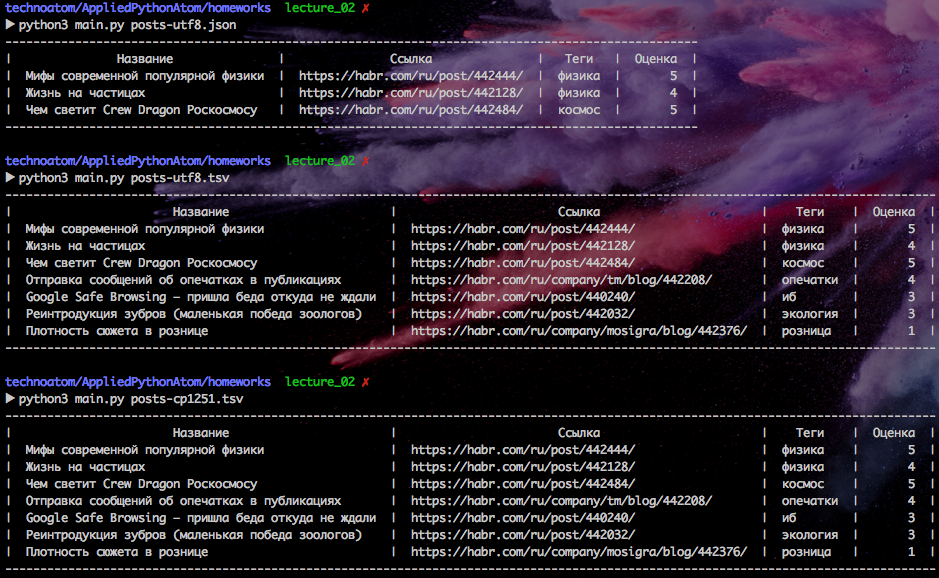